In [110]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
from sklearn import linear_model

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.notebook_repr_html', False)

In [111]:
# load data
# df = pd.read_csv('bounty_success_rates_median.csv')
df = pd.read_csv('bounty_success_rates_mean.csv')

In [112]:
df

    buckets     average     range  num_finished  num_total  success_rate
0         1   15.917631    [0,47)         197.0        286      0.688811
1         2   32.106570   [2,100)         148.0        202      0.732673
2         3   33.021122   [2,148)          96.0        135      0.711111
3         4   39.732813   [0,160)          46.0         69      0.666667
4         5   49.663153   [2,201)          31.0         54      0.574074
5         6   69.036366   [5,251)          18.0         30      0.600000
6         7   59.076126   [5,166)          24.0         32      0.750000
7         8   39.660653   [5,121)          14.0         20      0.700000
8         9   86.709806  [20,401)          13.0         16      0.812500
9        10  155.191271  [17,498)           7.0         10      0.700000
10       11   32.982269   [14,69)           2.0          4      0.500000
11       13  113.916667  [63,201)           4.0          7      0.571429
12       14    1.195694     [1,2)           2.0    

In [122]:
# data modification
df = df[
    (df['success_rate'] > 0.60) & 
    (df['success_rate'] <= 1) & 
    (pd.notnull(df['average'])) &
    (df['buckets'] <= 10) &
    (df['average'] < 150)
]

In [123]:
df

   buckets    average     range  num_finished  num_total  success_rate
0        1  15.917631    [0,47)         197.0        286      0.688811
1        2  32.106570   [2,100)         148.0        202      0.732673
2        3  33.021122   [2,148)          96.0        135      0.711111
3        4  39.732813   [0,160)          46.0         69      0.666667
6        7  59.076126   [5,166)          24.0         32      0.750000
7        8  39.660653   [5,121)          14.0         20      0.700000
8        9  86.709806  [20,401)          13.0         16      0.812500

In [124]:
# scatter
x = np.array(df['average'])
y = np.array(df['success_rate'])
# x = np.array(df['median_hourly_rate'])
# y = np.array(df['success_rate'])

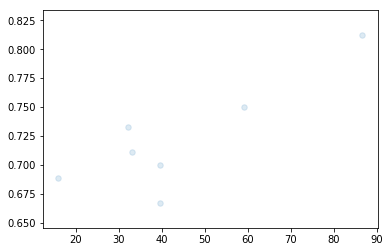

In [125]:
plt.scatter(x, y, s=30, alpha=0.15, marker='o')

In [126]:
par = np.polyfit(x, y, 1, full=True)

In [127]:
par

(array([ 0.00176688,  0.64581438]),
 array([ 0.0040471]),
 2,
 array([ 1.3784415 ,  0.31606809]),
 1.5543122344752192e-15)

In [128]:
slope=par[0][0]
intercept=par[0][1]
xl = [min(x), max(x)]
yl = [slope*xx + intercept for xx in xl]

In [129]:
slope

0.0017668774645238942

In [130]:
intercept

0.64581438230390653